In [1]:
%matplotlib inline


# Regression

The following example shows how to fit a simple regression model with
*auto-sklearn*.


In [2]:
from pprint import pprint

import sklearn.datasets
import sklearn.metrics

import autosklearn.regression
import matplotlib.pyplot as plt

## Data Loading



In [3]:
X, y = sklearn.datasets.load_diabetes(return_X_y=True)

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(
    X, y, random_state=1
)

## Build and fit a regressor



In [4]:
automl = autosklearn.regression.AutoSklearnRegressor(
    time_left_for_this_task=120,
    per_run_time_limit=30,
    tmp_folder="/tmp/autosklearn_regression_example_tmp",
)
automl.fit(X_train, y_train, dataset_name="diabetes")

Fitting to the training data: 100%|██████████| 120/120 [01:50<00:00,  1.09it/s, The total time budget for this task is 0:02:00]


AutoSklearnRegressor(ensemble_class=<class 'autosklearn.ensembles.ensemble_selection.EnsembleSelection'>,
                     per_run_time_limit=30, time_left_for_this_task=120,
                     tmp_folder='/tmp/autosklearn_regression_example_tmp')

## View the models found by auto-sklearn



In [5]:
print(automl.leaderboard())

          rank  ensemble_weight           type      cost  duration
model_id                                                          
54           1             0.48     libsvm_svr  0.430891  0.622229
22           2             0.24     libsvm_svr  0.461373  0.610200
28           3             0.16            sgd  0.461985  0.615942
52           4             0.06     libsvm_svr  0.464652  0.611690
11           5             0.06  random_forest  0.507400  7.657798


## Print the final ensemble constructed by auto-sklearn



In [6]:
pprint(automl.show_models(), indent=4)

{   11: {   'cost': 0.5073997164657239,
            'data_preprocessor': <autosklearn.pipeline.components.data_preprocessing.DataPreprocessorChoice object at 0x7fe9009f7880>,
            'ensemble_weight': 0.06,
            'feature_preprocessor': <autosklearn.pipeline.components.feature_preprocessing.FeaturePreprocessorChoice object at 0x7fe9004c73d0>,
            'model_id': 11,
            'rank': 12,
            'regressor': <autosklearn.pipeline.components.regression.RegressorChoice object at 0x7fe9004c7d30>,
            'sklearn_regressor': RandomForestRegressor(bootstrap=False, criterion='mae',
                      max_features=0.6277363920171745, min_samples_leaf=6,
                      min_samples_split=15, n_estimators=512, n_jobs=1,
                      random_state=1, warm_start=True)},
    22: {   'cost': 0.46137275616021056,
            'data_preprocessor': <autosklearn.pipeline.components.data_preprocessing.DataPreprocessorChoice object at 0x7fe90107a970>,
           

## Get the Score of the final ensemble
After training the estimator, we can now quantify the goodness of fit. One possibility for
is the [R2 score](https://scikit-learn.org/stable/modules/model_evaluation.html#r2-score).
The values range between -inf and 1 with 1 being the best possible value. A dummy estimator
predicting the data mean has an R2 score of 0.



In [7]:
train_predictions = automl.predict(X_train)
print("Train R2 score:", sklearn.metrics.r2_score(y_train, train_predictions))
test_predictions = automl.predict(X_test)
print("Test R2 score:", sklearn.metrics.r2_score(y_test, test_predictions))

Train R2 score: 0.5968933126068658
Test R2 score: 0.38414100512295046


## Plot the predictions
Furthermore, we can now visually inspect the predictions. We plot the true value against the
predictions and show results on train and test data. Points on the diagonal depict perfect
predictions. Points below the diagonal were overestimated by the model (predicted value is higher
than the true value), points above the diagonal were underestimated (predicted value is lower than
the true value).



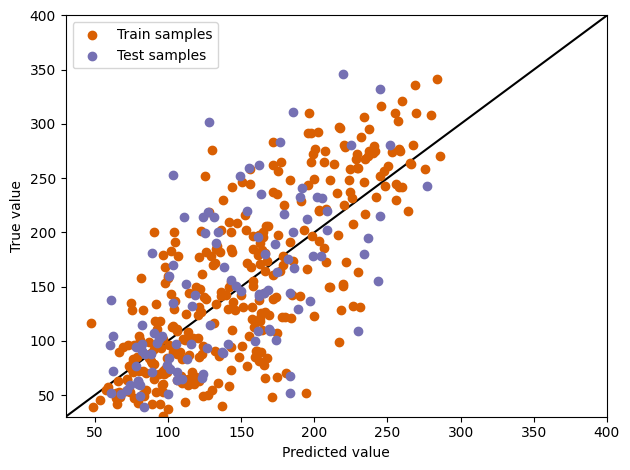

In [8]:
plt.scatter(train_predictions, y_train, label="Train samples", c="#d95f02")
plt.scatter(test_predictions, y_test, label="Test samples", c="#7570b3")
plt.xlabel("Predicted value")
plt.ylabel("True value")
plt.legend()
plt.plot([30, 400], [30, 400], c="k", zorder=0)
plt.xlim([30, 400])
plt.ylim([30, 400])
plt.tight_layout()
plt.show()